# Healthcare Workforce Mental Health Analysis

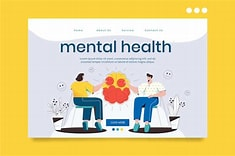

In [140]:
from IPython.display import Image, display

# Show image
display(Image(filename='OIP.jpeg'))


# Objective: 
### To analyze key factors that contribute to high burnout and turnover rates in the 
###healthcare workforce, identifying departments, job roles, and workplace conditions 
### that are most at risk. 

# Key Questions:
### 1. 
### Which job roles and departments experience the highest stress and burnout 
### rates? 
### 2. How does burnout frequency affect job satisfaction and turnover intention? 
### 3. What workplace factors contribute most to mental health absences? 
### 4. Do employees with access to Employee Assistance Programs (EAPs) show 
### lower burnout and absenteeism rates. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv('Healthcare Workforce Mental Health Dataset.csv')

In [3]:
df.head()

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,HCP-00001,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,HCP-00002,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,HCP-00003,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,HCP-00004,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,HCP-00005,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No


# Checking for null Values

In [5]:
df.isnull().sum()

Employee ID               0
Employee Type             0
Department                0
Workplace Factor          0
Stress Level              0
Burnout Frequency         0
Job Satisfaction          0
Access to EAPs            0
Mental Health Absences    0
Turnover Intention        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Employee ID             5000 non-null   object
 1   Employee Type           5000 non-null   object
 2   Department              5000 non-null   object
 3   Workplace Factor        5000 non-null   object
 4   Stress Level            5000 non-null   int64 
 5   Burnout Frequency       5000 non-null   object
 6   Job Satisfaction        5000 non-null   int64 
 7   Access to EAPs          5000 non-null   object
 8   Mental Health Absences  5000 non-null   int64 
 9   Turnover Intention      5000 non-null   object
dtypes: int64(3), object(7)
memory usage: 390.8+ KB


In [7]:
df.describe()

,Stress Level,Job Satisfaction,Mental Health Absences
count,5000.000000,5000.000000,5000.000000
mean,7.327800,2.202200,7.396200
std,1.407673,1.045722,2.878625
min,4.000000,1.000000,0.000000
25%,7.000000,1.000000,5.000000
50%,8.000000,2.000000,7.000000
75%,8.000000,3.000000,9.000000
max,9.000000,5.000000,19.000000


In [8]:
df.shape

(5000, 10)

# Checking for duplicates

In [10]:
df.duplicated().sum()

0

In [11]:
df['Burnout Frequency'].unique()

array(['Often', 'Occasionally', 'Never'], dtype=object)

In [12]:
burnout_by_employee_type=df.groupby(['Employee Type','Burnout Frequency'])['Employee ID'].count()
burnout_by_employee_type

Employee Type             Burnout Frequency
Critical Care Nurse       Never                 73
                          Occasionally         165
                          Often                250
Healthcare Administrator  Never                149
                          Occasionally         244
                          Often                114
Laboratory Technician     Never                 58
                          Occasionally         145
                          Often                151
Medical Assistant         Never                 80
                          Occasionally         202
                          Often                231
Nursing Assistant         Never                 65
                          Occasionally         209
                          Often                228
Pediatric Nurse           Never                 43
                          Occasionally          97
                          Often                122
Physician (General)       Never       

### Pairplots

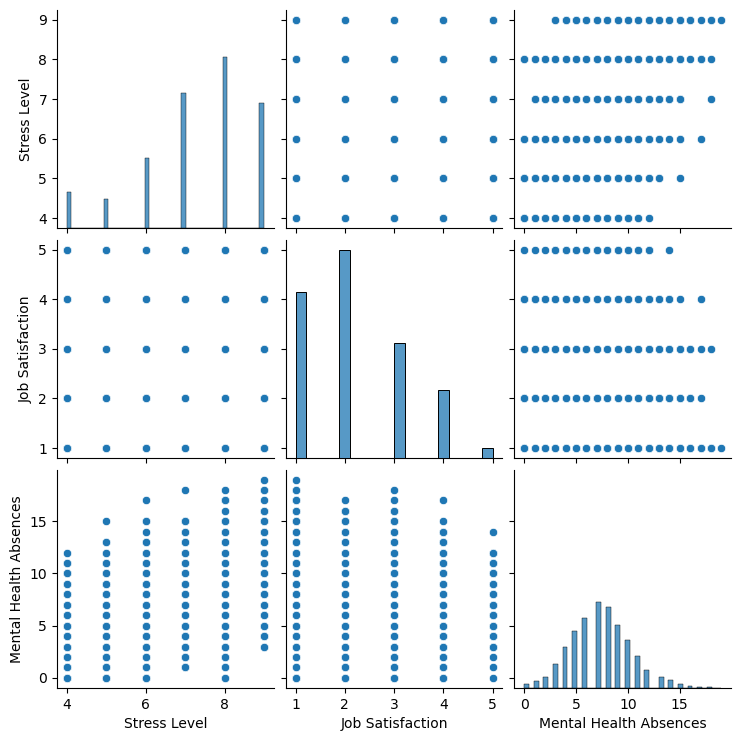

In [14]:
sns.pairplot(df)

# Burnout Level Distribution

C:\Users\abhay\AppData\Local\Temp\ipykernel_16572\928980943.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Burnout Frequency',data=df,palette='Reds_r')


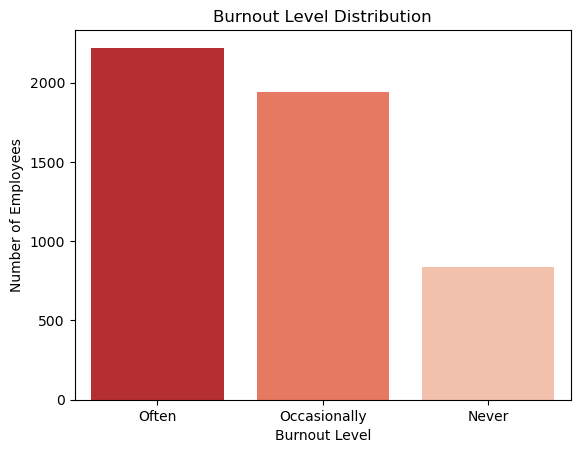

In [16]:
sns.countplot(x='Burnout Frequency',data=df,palette='Reds_r')
plt.title("Burnout Level Distribution")
plt.xlabel('Burnout Level')
plt.ylabel('Number of Employees')
plt.show()

# Department Vs Stress Level

In [18]:
department_wise_Stress=df.groupby('Department')['Stress Level'].mean().sort_values(ascending=False).reset_index()

C:\Users\abhay\AppData\Local\Temp\ipykernel_16572\533570378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=department_wise_Stress,x='Department', y='Stress Level',palette="viridis")


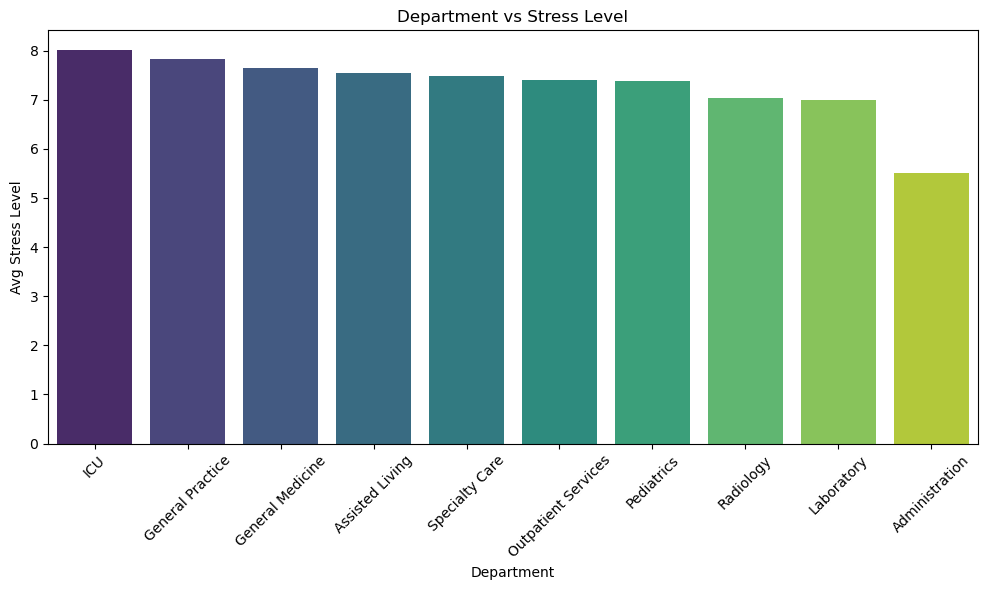

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=department_wise_Stress,x='Department', y='Stress Level',palette="viridis")
plt.xticks(rotation=45)
plt.title("Department vs Stress Level")
plt.ylabel("Avg Stress Level")
plt.xlabel("Department")
plt.tight_layout()
plt.show()

In [20]:
round(df['Stress Level'].corr(df['Mental Health Absences']),3)

0.502

### Moderate Correlation between them-This indicates that as employee stress increases, they tend to take more mental health-related absences.

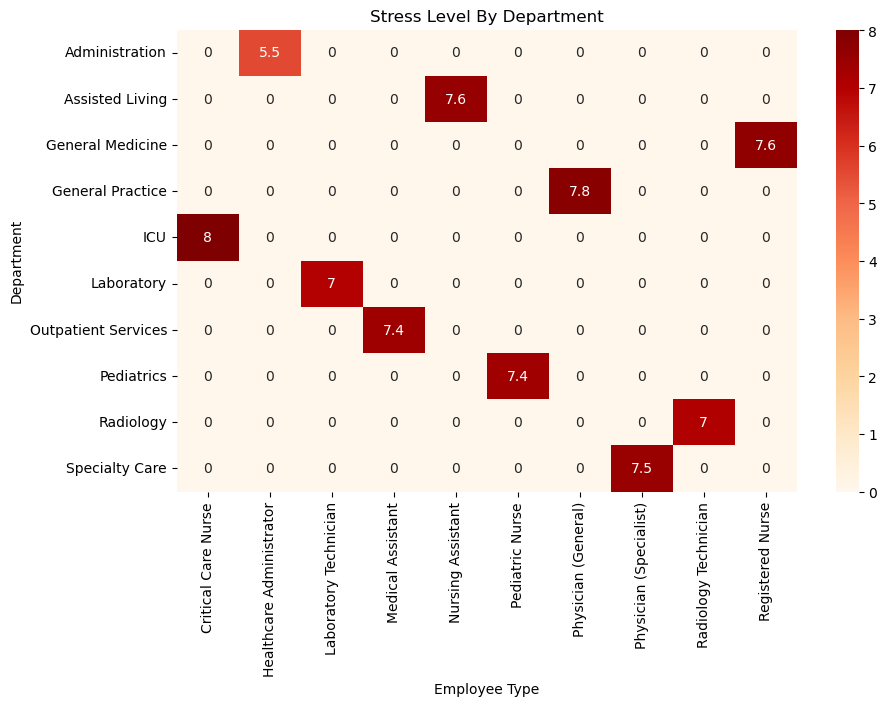

In [22]:
dept_pivot = pd.pivot_table(df, index='Department', columns='Employee Type', values='Stress Level', aggfunc='mean', fill_value=0)

plt.figure(figsize=(10,6))
sns.heatmap(dept_pivot, annot=True, cmap='OrRd')
plt.title('Stress Level By Department')
plt.show()

In [23]:
df.head()

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,HCP-00001,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,HCP-00002,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,HCP-00003,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,HCP-00004,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,HCP-00005,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No


In [24]:
df.groupby('Burnout Frequency')['Job Satisfaction'].mean()

Burnout Frequency
Never           3.060859
Occasionally    2.394127
Often           1.710491
Name: Job Satisfaction, dtype: float64

In [25]:
x=df.shape[0]

In [26]:
BurnOut_Frequency_ThroughOut=df.groupby('Burnout Frequency')['Employee ID'].count()/x*100

In [27]:
BurnOut_Frequency_ThroughOut

Burnout Frequency
Never           16.76
Occasionally    38.82
Often           44.42
Name: Employee ID, dtype: float64

### BurnOut Frequency Distribution

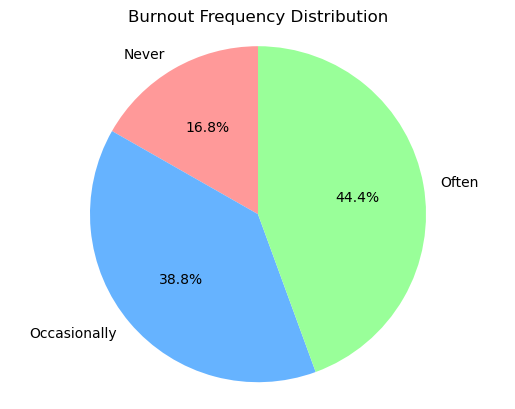

In [29]:
plt.pie(BurnOut_Frequency_ThroughOut,
        labels=BurnOut_Frequency_ThroughOut.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Burnout Frequency Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()

### High BurnOut Departments 

In [31]:
high_burnout_df = df[df['Burnout Frequency'] == 'Often']


In [32]:
# Total people per department
total_by_dept = df['Department'].value_counts()

# People with high burnout per department
high_burnout_by_dept = high_burnout_df['Department'].value_counts()

# Percentage of high burnout in each department
burnout_percent_dept = (high_burnout_by_dept / total_by_dept * 100).sort_values(ascending=False)


In [33]:
burnout_percent_dept

Department
ICU                    51.229508
General Practice       48.655914
General Medicine       47.544817
Radiology              46.808511
Pediatrics             46.564885
Specialty Care         46.064140
Assisted Living        45.418327
Outpatient Services    45.029240
Laboratory             42.655367
Administration         22.485207
Name: count, dtype: float64

C:\Users\abhay\AppData\Local\Temp\ipykernel_16572\3025953219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=burnout_percent_dept.index, y=burnout_percent_dept.values, palette="Reds_r")


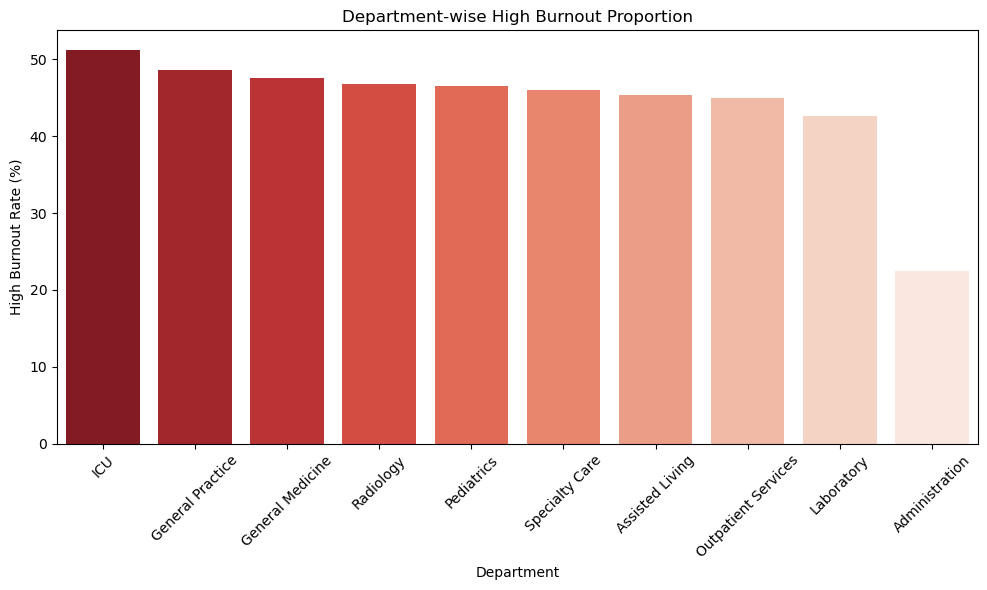

In [34]:

plt.figure(figsize=(10,6))
sns.barplot(x=burnout_percent_dept.index, y=burnout_percent_dept.values, palette="Reds_r")
plt.xticks(rotation=45)
plt.ylabel('High Burnout Rate (%)')
plt.title('Department-wise High Burnout Proportion')
plt.tight_layout()
plt.show()


In [35]:
df.head()

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,HCP-00001,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,HCP-00002,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,HCP-00003,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,HCP-00004,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,HCP-00005,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No


# Effect Of the WorkPlace Factors on The Employees

In [37]:
df.groupby('Workplace Factor')['Stress Level'].mean().sort_values(ascending=False).head(5)

Workplace Factor
Heavy Workload           8.204864
Work-Life Imbalance      8.020588
Safety Concerns          8.014458
Poor Work Environment    6.990196
Emotional Demands        6.771300
Name: Stress Level, dtype: float64

In [38]:
# Select only the relevant columns
cols_of_interest = ['Stress Level', 'Job Satisfaction', 'Mental Health Absences']

# Create pivot-style table
workplace_summary = df.groupby('Workplace Factor')[cols_of_interest].mean().round(2)

# Sort by Stress Level if needed
workplace_summary = workplace_summary.sort_values(by='Stress Level', ascending=False)

# Display
print(workplace_summary)

                          Stress Level  Job Satisfaction  \
Workplace Factor                                           
Heavy Workload                    8.20              1.97   
Work-Life Imbalance               8.02              2.00   
Safety Concerns                   8.01              2.02   
Poor Work Environment             6.99              2.28   
Emotional Demands                 6.77              2.28   
Job Insecurity                    5.69              2.89   
Unclear Job Expectations          4.88              2.90   
Career Stagnation                 4.70              2.92   

                          Mental Health Absences  
Workplace Factor                                  
Heavy Workload                              8.28  
Work-Life Imbalance                         7.87  
Safety Concerns                             8.20  
Poor Work Environment                       7.01  
Emotional Demands                           7.09  
Job Insecurity                            

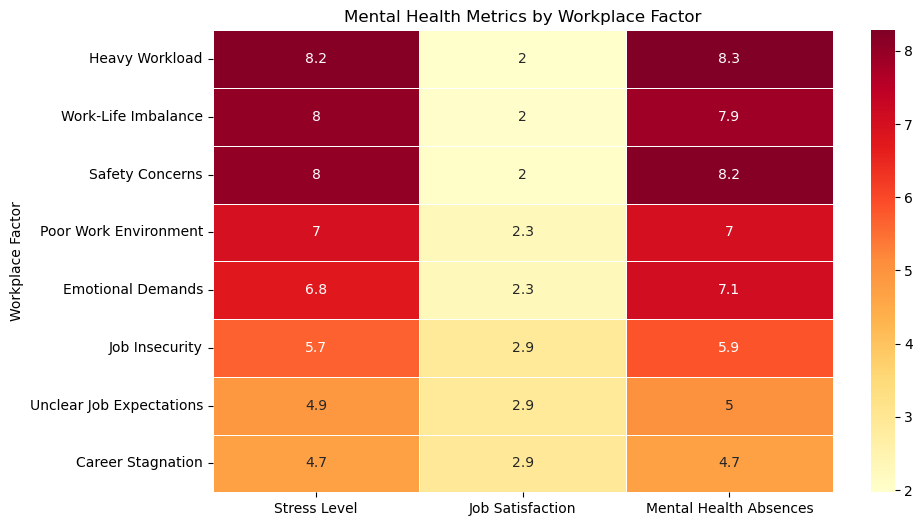

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(workplace_summary, annot=True, cmap="YlOrRd", linewidths=0.5)
plt.title("Mental Health Metrics by Workplace Factor")
plt.show()

### “Heavy Workload workplace has the highest stress and mental health absences while also having the lowest job satisfaction, suggesting a high-risk environment for employee well-being.”

In [41]:
df.head()

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,HCP-00001,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,HCP-00002,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,HCP-00003,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,HCP-00004,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,HCP-00005,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No


In [42]:
x=df[df['Turnover Intention']=='Yes']['Employee ID'].count()

In [43]:
df.groupby(['Workplace Factor'])['Employee ID'].count()

Workplace Factor
Career Stagnation            531
Emotional Demands            223
Heavy Workload              2138
Job Insecurity                85
Poor Work Environment       1122
Safety Concerns              415
Unclear Job Expectations     146
Work-Life Imbalance          340
Name: Employee ID, dtype: int64

In [44]:
turnover_intention_df = df[df['Turnover Intention'] == 'Yes']

In [45]:
Turnover_intent_dept = turnover_intention_df['Department'].value_counts()

In [46]:
Turnover_intent_dept

Department
General Medicine       894
Outpatient Services    348
ICU                    347
Assisted Living        343
General Practice       278
Administration         277
Radiology              238
Specialty Care         220
Laboratory             211
Pediatrics             179
Name: count, dtype: int64

### Stress level as according to the turnover intention

C:\Users\abhay\AppData\Local\Temp\ipykernel_16572\374232445.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Workplace Factor', y='Stress Level', hue='Turnover Intention', ci=None, order=order)


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Heavy Workload'),
  Text(1, 0, 'Work-Life Imbalance'),
  Text(2, 0, 'Safety Concerns'),
  Text(3, 0, 'Poor Work Environment'),
  Text(4, 0, 'Emotional Demands'),
  Text(5, 0, 'Job Insecurity'),
  Text(6, 0, 'Unclear Job Expectations'),
  Text(7, 0, 'Career Stagnation')])

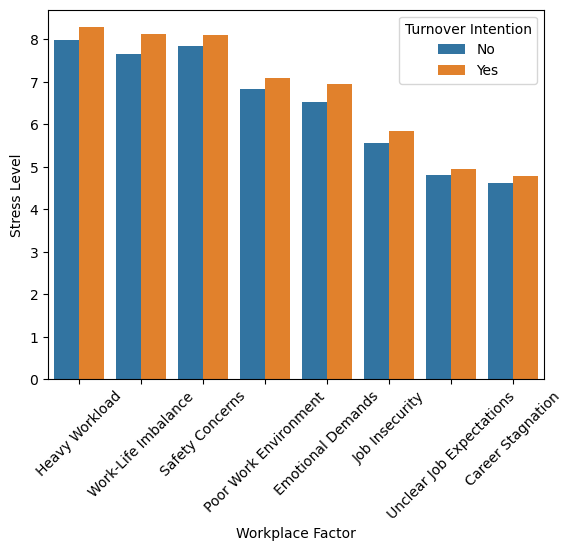

In [48]:
order = df.groupby('Workplace Factor')['Stress Level'].mean().sort_values(ascending=False).index
sns.barplot(data=df, x='Workplace Factor', y='Stress Level', hue='Turnover Intention', ci=None, order=order)
plt.xticks(rotation=45)

### Across all Workplace Factors, individuals with higher average Stress Levels are significantly more likely to show Turnover Intention.

# EAP's Significance on the Job satisfaction,stress level and other factors.

In [51]:
df.head()

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,HCP-00001,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,HCP-00002,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,HCP-00003,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,HCP-00004,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,HCP-00005,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No


In [52]:
df.groupby('Access to EAPs')['Employee ID'].count()

Access to EAPs
No     1406
Yes    3594
Name: Employee ID, dtype: int64

In [53]:
pd.crosstab(df['Burnout Frequency'],df['Access to EAPs'])

Access to EAPs,No,Yes
Burnout Frequency,,
Never,252,586
Occasionally,553,1388
Often,601,1620


([0, 1], [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

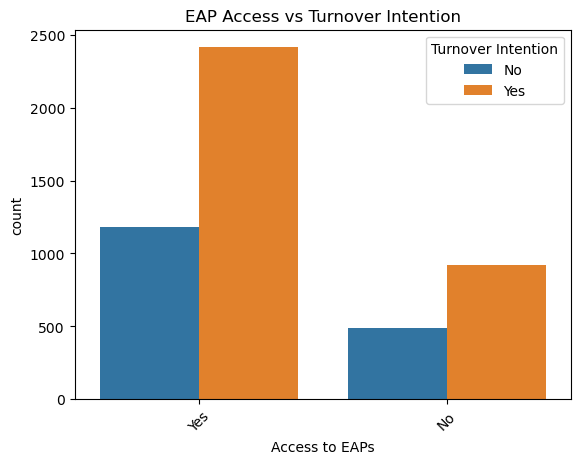

In [54]:
sns.countplot(data=df, x='Access to EAPs', hue='Turnover Intention')
plt.title("EAP Access vs Turnover Intention")
plt.xticks(rotation=45)

### While more employees with EAP access report burnout often, the difference is not huge compared to those without access. This suggests that:

### EAP programs might be under-utilized or insufficient in scope.

### Organizations should not just offer EAPs, but also promote them, remove stigma, and address root causes of burnout such as workload and management culture.

In [56]:
df.head()

,Employee ID,Employee Type,Department,Workplace Factor,Stress Level,Burnout Frequency,Job Satisfaction,Access to EAPs,Mental Health Absences,Turnover Intention
0,HCP-00001,Pediatric Nurse,Pediatrics,Heavy Workload,8,Often,2,Yes,6,No
1,HCP-00002,Laboratory Technician,Laboratory,Safety Concerns,8,Often,1,Yes,12,No
2,HCP-00003,Nursing Assistant,Assisted Living,Poor Work Environment,6,Occasionally,2,Yes,9,Yes
3,HCP-00004,Medical Assistant,Outpatient Services,Poor Work Environment,7,Never,4,No,11,No
4,HCP-00005,Registered Nurse,General Medicine,Work-Life Imbalance,8,Occasionally,2,Yes,7,No


# Stress Level accoring to the Department Wise Burnout frequency

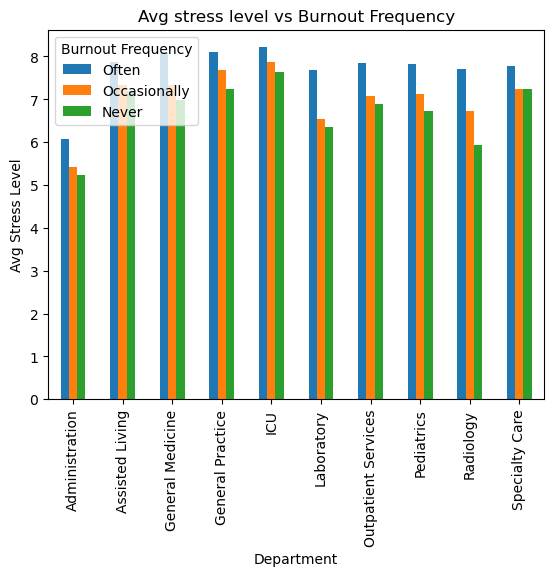

<Figure size 640x480 with 0 Axes>

In [58]:
x= df.groupby(['Department','Burnout Frequency'])['Stress Level'].mean().unstack()
x=x[['Often','Occasionally','Never']]
x.plot(kind='bar',title='Avg stress level vs Burnout Frequency')
plt.xlabel('Department')
plt.ylabel('Avg Stress Level')
plt.legend(title='Burnout Frequency')
plt.show()
plt.tight_layout()

### Often Burnout Shows Higher Stress Level

### Do people with no EAP access have higher burnout?

<Axes: xlabel='Access to EAPs'>

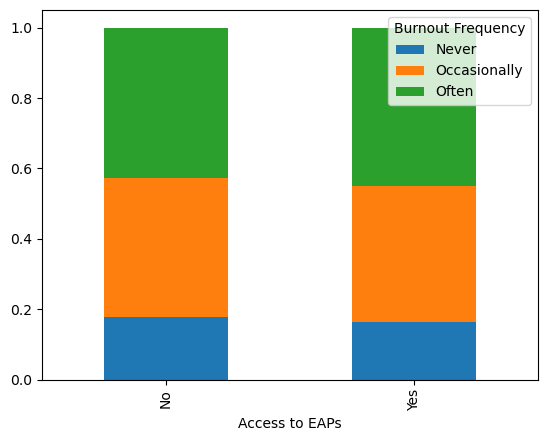

In [61]:
pd.crosstab(df['Access to EAPs'], df['Burnout Frequency'], normalize='index').plot(kind='bar', stacked=True)


### No there is no such relation as people having access to EAPs have more often burnouts .

### Is the stress level normally distributed or right-skewed?

<Axes: xlabel='Stress Level', ylabel='Count'>

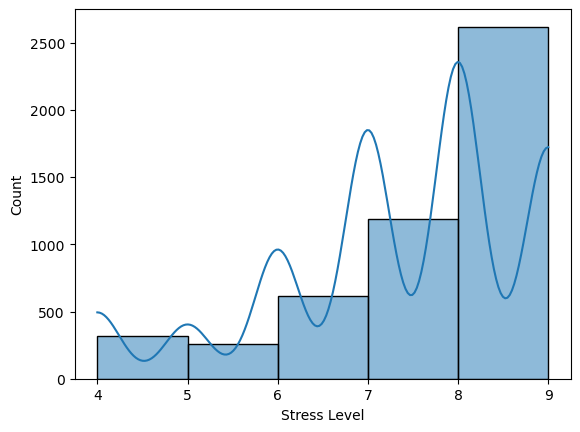

In [64]:
sns.histplot(df['Stress Level'],kde=True,bins=5)

### The KDE curve has multiple peaks, indicating multimodal distribution (i.e., several subgroups in the population with different stress behaviors).

### Q)- How does burnout frequency affect job satisfaction

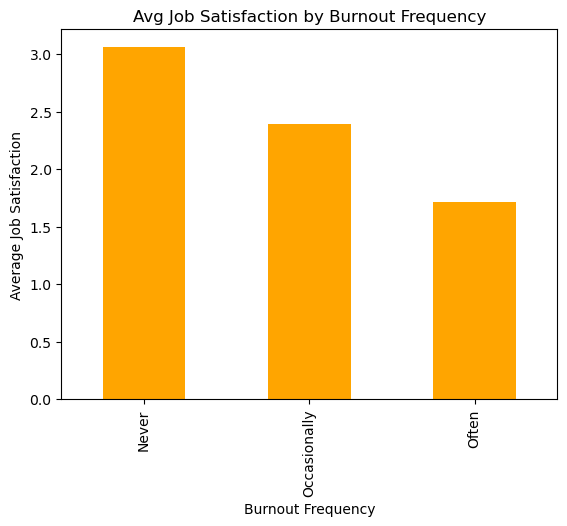

In [128]:
df.groupby('Burnout Frequency')['Job Satisfaction'].mean().plot(kind='bar', color='orange')
plt.ylabel('Average Job Satisfaction')
plt.title('Avg Job Satisfaction by Burnout Frequency')
plt.show()

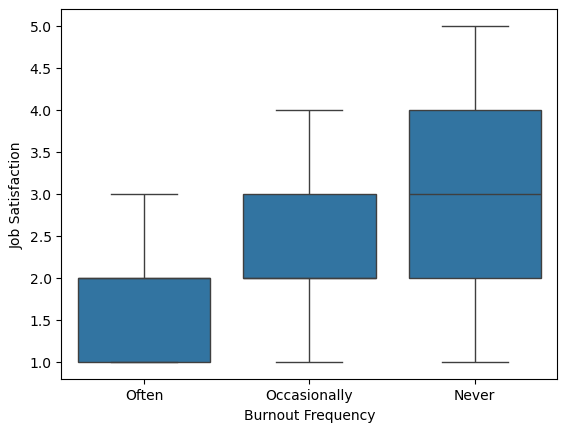

In [130]:
sns.boxplot(x='Burnout Frequency',y='Job Satisfaction',data=df)
plt.show()

# Employees experiencing burnout often report low job satisfaction (scores ≤ 2). 

# Dataset Insights for the Case Study 
### ✔ Burnout & Stress by Job Role: 
### ● Employees in ICU, General Medicine, and Radiology report the highest stress 
### levels. 
### ● Heavy Workload is the leading stress factor for clinical roles, while Career 
# Stagnation is a major issue for administrators. 
### ✔ Burnout's Impact on Job Satisfaction & Turnover: 
### ● Employees experiencing burnout often report low job satisfaction (scores ≤ 2). 
### ● 43% of employees show high burnout, with turnover rates significantly higher 
### among this group. 
### ✔ Mental Health Absences & EAP Access: 
### ● Employees without access to EAPs take more mental health-related absences. 
### ● The correlation suggests that providing EAPs could help mitigate workforce 
### burnout. 
# ✔ Turnover Intention Predictors: 
### ● Employees with stress levels of 7-10 and job satisfaction ≤ 2 are at highest risk 
### of leaving. 
### ● Turnover risks are most significant in General Medicine and ICU departments. 